**Task1 : Data Manipulation and cleaning**

In [1]:
import numpy as np
import pandas as pd
data = pd.read_csv("/content/employee_data.csv")

In [10]:
data.head()

,EmployeeID,Name,Department,Salary,JoiningDate,Status
0,7970,NaN,Operations,44168.0,2023-04-16,Terminated
1,1752,Shannon Franco,HR,80140.0,2016-08-22,Terminated
2,8478,NaN,HR,144316.0,2023-11-04,Terminated
3,5157,Barbara Alvarez,Operations,35075.0,2023-04-22,NaN
4,1816,Adam Cobb,Sales,142537.0,2016-05-12,Active


In [9]:
data.tail()

,EmployeeID,Name,Department,Salary,JoiningDate,Status
495,2862,NaN,Operations,83271.0,2019-03-19,Active
496,3910,Douglas English,Engineering,94038.0,2022-09-23,Resigned
497,1009,NaN,Sales,102768.0,2023-03-24,Active
498,3062,Christopher Perry,NaN,129374.0,2023-12-01,Terminated
499,3252,Amanda Goodwin,Operations,61499.0,2020-07-18,NaN


In [14]:
#removed duplicate entries
data.drop_duplicates()

,EmployeeID,Name,Department,Salary,JoiningDate,Status
0,7970,NaN,Operations,44168.0,2023-04-16,Terminated
1,1752,Shannon Franco,HR,80140.0,2016-08-22,Terminated
2,8478,NaN,HR,144316.0,2023-11-04,Terminated
3,5157,Barbara Alvarez,Operations,35075.0,2023-04-22,NaN
4,1816,Adam Cobb,Sales,142537.0,2016-05-12,Active
...,...,...,...,...,...,...
495,2862,NaN,Operations,83271.0,2019-03-19,Active
496,3910,Douglas English,Engineering,94038.0,2022-09-23,Resigned
497,1009,NaN,Sales,102768.0,2023-03-24,Active
498,3062,Christopher Perry,NaN,129374.0,2023-12-01,Terminated


In [23]:
#handle missing values by dropping the rows
data.dropna()

,EmployeeID,Name,Department,Salary,JoiningDate,Status
1,1752,Shannon Franco,HR,80140.0,2016-08-22,Terminated
4,1816,Adam Cobb,Sales,142537.0,2016-05-12,Active
6,6247,Allison Salas,Engineering,59154.0,2023-06-14,On Leave
7,5968,Daniel Rodriguez,Engineering,56158.0,2016-03-29,Terminated
8,3344,Scott Coleman,Operations,137031.0,2018-08-04,On Leave
...,...,...,...,...,...,...
487,1586,Brian Kim,Engineering,66211.0,2023-06-13,Active
488,3772,Jonathan Haley,Marketing,102848.0,2024-01-11,Active
489,9544,Sonya Watts,HR,31330.0,2016-04-01,Active
492,7210,Phillip Riley,Sales,41221.0,2023-01-04,Active


In [24]:
#converted joiningdate column to a proper datetime format
data['JoiningDate'] = pd.to_datetime(data['JoiningDate'])
print(data)

     EmployeeID               Name   Department    Salary JoiningDate  \
0          7970                NaN   Operations   44168.0  2023-04-16   
1          1752     Shannon Franco           HR   80140.0  2016-08-22   
2          8478                NaN           HR  144316.0  2023-11-04   
3          5157    Barbara Alvarez   Operations   35075.0  2023-04-22   
4          1816          Adam Cobb        Sales  142537.0  2016-05-12   
..          ...                ...          ...       ...         ...   
495        2862                NaN   Operations   83271.0  2019-03-19   
496        3910    Douglas English  Engineering   94038.0  2022-09-23   
497        1009                NaN        Sales  102768.0  2023-03-24   
498        3062  Christopher Perry          NaN  129374.0  2023-12-01   
499        3252     Amanda Goodwin   Operations   61499.0  2020-07-18   

         Status  
0    Terminated  
1    Terminated  
2    Terminated  
3           NaN  
4        Active  
..          ...

In [25]:
#filtering employees where status is resigned
resigned_employees = data[data['Status'] == 'Resigned']
print(resigned_employees)

     EmployeeID              Name   Department    Salary JoiningDate    Status
5          7766     Tyrone Miller  Engineering       NaN  2023-08-21  Resigned
9          1255               NaN           HR   90332.0  2015-04-23  Resigned
10         4786  Loretta Espinoza   Operations   75830.0  2014-12-24  Resigned
12         4245     Jamie Aguilar      Finance  137549.0  2015-06-26  Resigned
14         7189  Andrew Zimmerman      Finance  144206.0  2015-09-17  Resigned
..          ...               ...          ...       ...         ...       ...
480        3147       Susan Burke      Finance   63862.0  2015-01-09  Resigned
482        4816         Bryan Cox      Finance   66655.0  2020-08-30  Resigned
483        6198      Thomas Nunez   Operations  145385.0  2017-09-20  Resigned
484        2774   Joseph Anderson          NaN  108139.0         NaT  Resigned
496        3910   Douglas English  Engineering   94038.0  2022-09-23  Resigned

[114 rows x 6 columns]


In [27]:
#average salary of employees in each department
average_salary_by_department = data.groupby('Department')['Salary'].mean()
print(average_salary_by_department)

Department
Engineering    97820.101266
Finance        92685.220588
HR             86008.105263
Marketing      84951.058824
Operations     95395.333333
Sales          91866.079365
Name: Salary, dtype: float64


In [29]:
#list of employees joined after year 2020
joined_after_2020 = data[data['JoiningDate'].dt.year > 2020]
print(joined_after_2020)

     EmployeeID               Name   Department    Salary JoiningDate  \
0          7970                NaN   Operations   44168.0  2023-04-16   
2          8478                NaN           HR  144316.0  2023-11-04   
3          5157    Barbara Alvarez   Operations   35075.0  2023-04-22   
5          7766      Tyrone Miller  Engineering       NaN  2023-08-21   
6          6247      Allison Salas  Engineering   59154.0  2023-06-14   
..          ...                ...          ...       ...         ...   
492        7210      Phillip Riley        Sales   41221.0  2023-01-04   
494        4951     Terry Harrison          NaN  124381.0  2022-10-10   
496        3910    Douglas English  Engineering   94038.0  2022-09-23   
497        1009                NaN        Sales  102768.0  2023-03-24   
498        3062  Christopher Perry          NaN  129374.0  2023-12-01   

         Status  
0    Terminated  
2    Terminated  
3           NaN  
5      Resigned  
6      On Leave  
..          ...

In [54]:
#result of analysis
print("Average Salary of Employees by Department:\n")
print(average_salary_by_department)
print("\nEmployees Joined After 2020:\n")
print(joined_after_2020)

Average Salary of Employees by Department:

Department
Engineering    97820.101266
Finance        92685.220588
HR             86008.105263
Marketing      84951.058824
Operations     95395.333333
Sales          91866.079365
Name: Salary, dtype: float64

Employees Joined After 2020:

     EmployeeID               Name   Department    Salary JoiningDate  \
0          7970                NaN   Operations   44168.0  2023-04-16   
2          8478                NaN           HR  144316.0  2023-11-04   
3          5157    Barbara Alvarez   Operations   35075.0  2023-04-22   
5          7766      Tyrone Miller  Engineering       NaN  2023-08-21   
6          6247      Allison Salas  Engineering   59154.0  2023-06-14   
..          ...                ...          ...       ...         ...   
492        7210      Phillip Riley        Sales   41221.0  2023-01-04   
494        4951     Terry Harrison          NaN  124381.0  2022-10-10   
496        3910    Douglas English  Engineering   94038.0  2

In [55]:
#exporting data to a dataframe
data.to_csv('cleaned_employee_data.csv', index=False)

In [56]:
df = pd.read_csv("/content/cleaned_employee_data.csv")
print(df)

     EmployeeID              Name   Department    Salary JoiningDate  \
0          1752    Shannon Franco           HR   80140.0  2016-08-22   
1          1816         Adam Cobb        Sales  142537.0  2016-05-12   
2          6247     Allison Salas  Engineering   59154.0  2023-06-14   
3          5968  Daniel Rodriguez  Engineering   56158.0  2016-03-29   
4          3344     Scott Coleman   Operations  137031.0  2018-08-04   
..          ...               ...          ...       ...         ...   
288        1586         Brian Kim  Engineering   66211.0  2023-06-13   
289        3772    Jonathan Haley    Marketing  102848.0  2024-01-11   
290        9544       Sonya Watts           HR   31330.0  2016-04-01   
291        7210     Phillip Riley        Sales   41221.0  2023-01-04   
292        3910   Douglas English  Engineering   94038.0  2022-09-23   

         Status  
0    Terminated  
1        Active  
2      On Leave  
3    Terminated  
4      On Leave  
..          ...  
288      

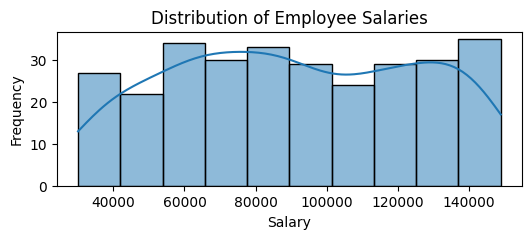

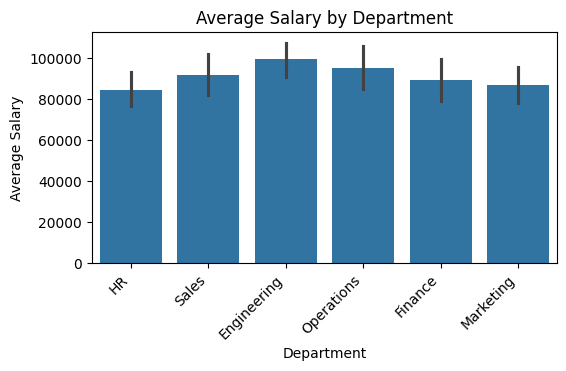

In [81]:
#distribution of Salaries
plt.figure(figsize=(6, 2))
sns.histplot(df['Salary'], kde=True)
plt.title('Distribution of Employee Salaries')
plt.xlabel('Salary')
plt.ylabel('Frequency')
plt.show()

#average salary by department
plt.figure(figsize=(6, 3))
sns.barplot(x=df['Department'], y=df['Salary'])
plt.title('Average Salary by Department')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.xticks(rotation=45, ha='right')
plt.show()

**Task 2 : Data Visualization**

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [70]:
df1 = pd.read_csv("/content/cancer.csv")
df1.head()

,Id,Diagnosis,Radius (mean),Texture (mean),Perimeter (mean),Area (mean),Smoothness (mean),Compactness (mean),Concavity (mean),Concave points (mean),...,Radius (worst),Texture (worst),Perimeter (worst),Area (worst),Smoothness (worst),Compactness (worst),Concavity (worst),Concave points (worst),Symmetry (worst),Fractal dimension (worst)
0,8510426,B,13.540,14.36,87.46,566.3,0.09779,0.08129,0.06664,0.047810,...,15.110,19.26,99.70,711.2,0.14400,0.17730,0.23900,0.12880,0.2977,0.07259
1,8510653,B,13.080,15.71,85.63,520.0,0.10750,0.12700,0.04568,0.031100,...,14.500,20.49,96.09,630.5,0.13120,0.27760,0.18900,0.07283,0.3184,0.08183
2,8510824,B,9.504,12.44,60.34,273.9,0.10240,0.06492,0.02956,0.020760,...,10.230,15.66,65.13,314.9,0.13240,0.11480,0.08867,0.06227,0.2450,0.07773
3,854941,B,13.030,18.42,82.61,523.8,0.08983,0.03766,0.02562,0.029230,...,13.300,22.81,84.46,545.9,0.09701,0.04619,0.04833,0.05013,0.1987,0.06169
4,85713702,B,8.196,16.84,51.71,201.9,0.08600,0.05943,0.01588,0.005917,...,8.964,21.96,57.26,242.2,0.12970,0.13570,0.06880,0.02564,0.3105,0.07409


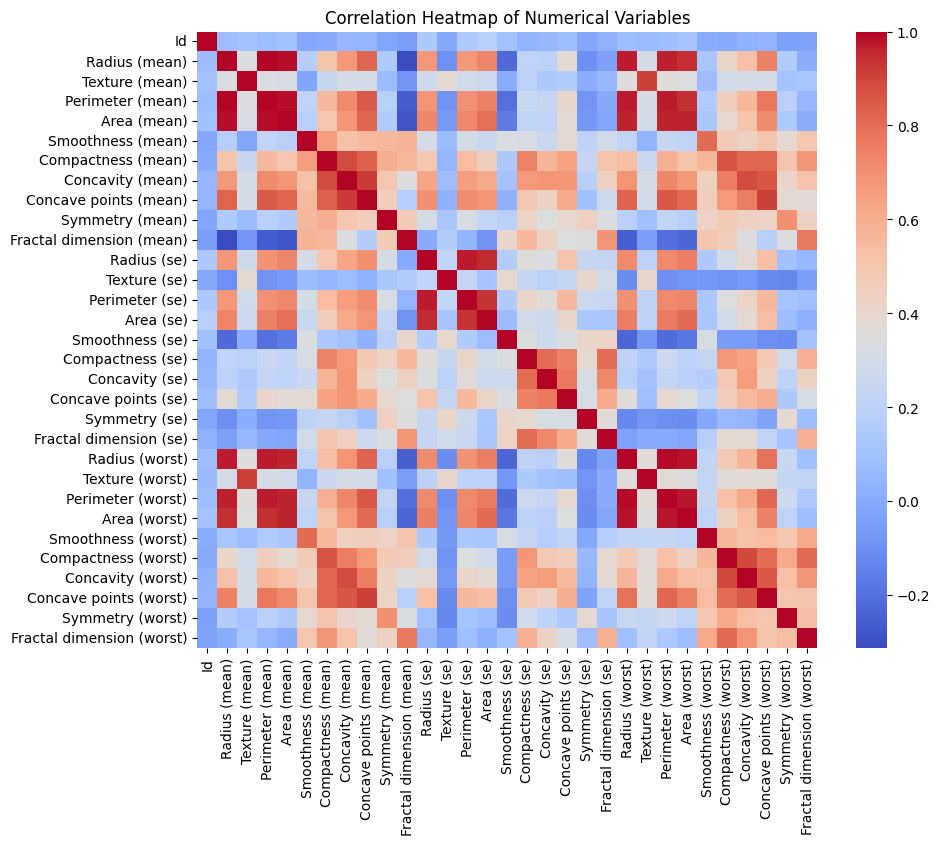

In [87]:
#correlation heatmap of all numerical variables in dataset
correlation = df1.select_dtypes(include=np.number).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap of Numerical Variables")
plt.show()

**Section 2**

In [95]:
#loading dataset
df2 = pd.read_csv("/content/diabetes_prediction_dataset.csv")
print(df2)

       gender   age  hypertension  heart_disease smoking_history    bmi  \
0      Female  80.0             0              1           never  25.19   
1      Female  54.0             0              0         No Info  27.32   
2        Male  28.0             0              0           never  27.32   
3      Female  36.0             0              0         current  23.45   
4        Male  76.0             1              1         current  20.14   
...       ...   ...           ...            ...             ...    ...   
99995  Female  80.0             0              0         No Info  27.32   
99996  Female   2.0             0              0         No Info  17.37   
99997    Male  66.0             0              0          former  27.83   
99998  Female  24.0             0              0           never  35.42   
99999  Female  57.0             0              0         current  22.43   

       HbA1c_level  blood_glucose_level  diabetes  
0              6.6                  140        

In [101]:
df2.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [100]:
#check null values
df2.isnull().sum()

,0
age,0
hypertension,0
heart_disease,0
bmi,0
HbA1c_level,0
blood_glucose_level,0
diabetes,0
gender_Female,0
gender_Male,0
gender_Other,0


In [110]:
print(df2.columns)

Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes', 'gender_Female', 'gender_Male',
       'gender_Other', 'smoking_history_No Info', 'smoking_history_current',
       'smoking_history_ever', 'smoking_history_former',
       'smoking_history_never', 'smoking_history_not current'],
      dtype='object')


In [115]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

#defined features (X) and target (y)
X = df2.drop('diabetes', axis=1)
y = df2['diabetes']

#split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#initialized and trained a RandomForestClassifier
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

#predictions
y_pred = model.predict(X_test)

#evaluation of the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred))

Accuracy: 0.9701
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [125]:
from sklearn.tree import DecisionTreeClassifier

#initialized and trained a DecisionTreeClassifier
model1 = DecisionTreeClassifier(random_state=42)
model1.fit(X_train, y_train)

#predictions
y_pred1 = model.predict(X_test)

#evaluation
accuracy = accuracy_score(y_test, y_pred1)
print(f"Accuracy: {accuracy}")
print(classification_report(y_test, y_pred1))

Accuracy: 0.9701
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     18292
           1       0.95      0.69      0.80      1708

    accuracy                           0.97     20000
   macro avg       0.96      0.84      0.89     20000
weighted avg       0.97      0.97      0.97     20000



In [118]:
from sklearn.neighbors import KNeighborsClassifier

#initialized and trained a KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors=5)  # You can adjust the number of neighbors
knn_model.fit(X_train, y_train)

#predictions
y_pred_knn = knn_model.predict(X_test)

#evaluation
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f"KNN Accuracy: {accuracy_knn}")
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.96055
              precision    recall  f1-score   support

           0       0.96      0.99      0.98     18292
           1       0.89      0.61      0.73      1708

    accuracy                           0.96     20000
   macro avg       0.93      0.80      0.85     20000
weighted avg       0.96      0.96      0.96     20000



Text(0.5, 1.0, 'KNN Classification')

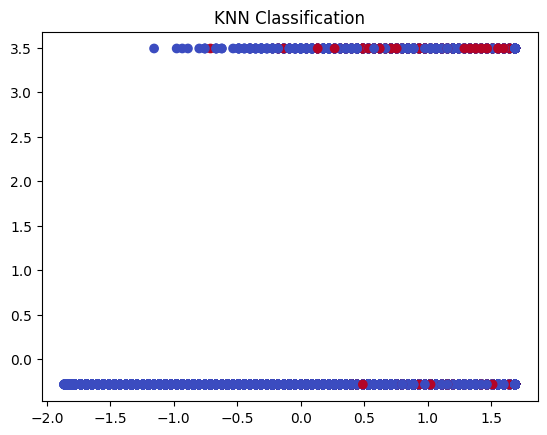

In [120]:
#scatter plot
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred_knn, cmap='coolwarm')
plt.title('KNN Classification')

**Sentiment Analysis**

In [130]:
#loading dataset
sentiment_data = pd.read_csv("/content/sentiment_analysis.csv")
sentiment_data.head()

,Year,Month,Day,Time of Tweet,text,sentiment,Platform
0,2018,8,18,morning,What a great day!!! Looks like dream.,positive,Twitter
1,2018,8,18,noon,"I feel sorry, I miss you here in the sea beach",positive,Facebook
2,2017,8,18,night,Don't angry me,negative,Facebook
3,2022,6,8,morning,We attend in the class just for listening teac...,negative,Facebook
4,2022,6,8,noon,"Those who want to go, let them go",negative,Instagram


In [134]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

def clean_text(text):
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Remove stopwords
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

# Applied the cleaning function to the 'text' column
sentiment_data['cleaned_text'] = sentiment_data['text'].apply(clean_text)
print(sentiment_data.head())

   Year  Month  Day Time of Tweet  \
0  2018      8   18       morning   
1  2018      8   18          noon   
2  2017      8   18         night   
3  2022      6    8       morning   
4  2022      6    8          noon   

                                                text sentiment     Platform  \
0              What a great day!!! Looks like dream.  positive    Twitter     
1     I feel sorry, I miss you here in the sea beach  positive    Facebook    
2                                     Don't angry me  negative     Facebook   
3  We attend in the class just for listening teac...  negative    Facebook    
4                  Those who want to go, let them go  negative   Instagram    

                                        cleaned_text  
0                         great day looks like dream  
1                          feel sorry miss sea beach  
2                                         dont angry  
3  attend class listening teachers reading slide ...  
4                          

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [138]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(sentiment_data['cleaned_text'])

#converted the TF-IDF matrix to a dense array
tfidf_array = tfidf_matrix.toarray()

#shape of the TF-IDF matrix
print("TF-IDF Matrix Shape:", tfidf_matrix.shape)

#printed vocalbulary
print("Vocabulary:", vectorizer.vocabulary_)

TF-IDF Matrix Shape: (499, 1303)
Vocabulary: {'great': 487, 'day': 288, 'looks': 670, 'like': 648, 'dream': 334, 'feel': 408, 'sorry': 1043, 'miss': 727, 'sea': 964, 'beach': 121, 'dont': 325, 'angry': 63, 'attend': 89, 'class': 232, 'listening': 655, 'teachers': 1104, 'reading': 908, 'slide': 1013, 'nonsence': 787, 'want': 1227, 'go': 472, 'let': 644, 'night': 783, 'feeling': 410, 'neutral': 774, 'feedings': 407, 'baby': 103, 'fun': 455, 'smiles': 1021, 'coos': 257, 'soooo': 1039, 'high': 531, 'today': 1138, 'first': 425, 'time': 1133, 'arrive': 83, 'boat': 150, 'amazing': 61, 'journey': 599, 'love': 677, 'something': 1031, 'emc2': 359, 'rules': 945, 'really': 914, 'song': 1034, 'cardigan': 200, 'taylor': 1102, 'swift': 1084, 'sharpie': 982, 'running': 949, 'dangerously': 284, 'low': 681, 'ink': 571, 'music': 758, 'tonight': 1144, 'lost': 673, 'voice': 1217, 'always': 59, 'somewhere': 1032, 'distrube': 318, 'care': 202, 'ive': 586, 'sick': 996, 'past': 836, 'days': 289, 'im': 565, 'co

In [144]:
X = tfidf_array
y = sentiment_data['sentiment']

In [145]:
#sentiment analysis model to classify text as Positive or Negative using simple rnn
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

#tokenization
tokenizer = Tokenizer(num_words=10000)  # Adjust num_words as needed
tokenizer.fit_on_texts(sentiment_data['cleaned_text'])
sequences = tokenizer.texts_to_sequences(sentiment_data['cleaned_text'])

max_length = 100
padded_sequences = pad_sequences(sequences, maxlen=max_length, padding='post', truncating='post')

#converted sentiment labels to numerical values (0 for Negative, 1 for Positive)
label_encoder = LabelEncoder()
sentiment_labels = label_encoder.fit_transform(sentiment_data['sentiment'])

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(padded_sequences, sentiment_labels, test_size=0.2, random_state=42)

#simple RNN model
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 64, input_length=max_length), # Adjust embedding dimensions as needed
    tf.keras.layers.SimpleRNN(32),  # Adjust units as needed
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#training
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1) # Adjust epochs and batch size as needed

#evaluation
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

#prediction
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int) # Convert probabilities to binary predictions

#classification report
print(classification_report(y_test, y_pred))

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


12/12 ━━━━━━━━━━━━━━━━━━━━ 6s 96ms/step - accuracy: 0.4272 - loss: 0.4978 - val_accuracy: 0.4250 - val_loss: -0.1142
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.4261 - loss: -0.0656 - val_accuracy: 0.4250 - val_loss: -0.3858
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - accuracy: 0.4272 - loss: -0.1562 - val_accuracy: 0.4250 - val_loss: -0.5166
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 83ms/step - accuracy: 0.4005 - loss: -0.2217 - val_accuracy: 0.4250 - val_loss: -0.6299
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step - accuracy: 0.3947 - loss: -0.1958 - val_accuracy: 0.4250 - val_loss: -0.7279
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4512 - loss: -0.4894 - val_accuracy: 0.4250 - val_loss: -0.8304
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.4475 - loss: -0.3616 - val_accuracy: 0.4250 - val_loss: -0.8892
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.3981 - loss: -0.2345 - val_accuracy: 0.4250 

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        36
           1       0.30      1.00      0.46        30
           2       0.00      0.00      0.00        34

    accuracy                           0.30       100
   macro avg       0.10      0.33      0.15       100
weighted avg       0.09      0.30      0.14       100



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
